# Data Mining Project - Building Water and Energy Benchmarking
## Data Mining (95-791) - Fall 2022
### Team Members: Devashri K, Tanay K, Tian L

##### Information Source (Website)
https://buildingperformancedc.org/#dc/2021?layer=electricity_grid_use&sort=electricity_grid_use&order=desc&lat=38.889931&lng=-77.009003&zoom=12

##### Raw Data (File URL for download)

https://www.kaggle.com/datasets/litian6665/dcenergy


##### Data Dictionary

For the column name descriptions and meanings are the following:
- 'pid': PID is an acronym used for Planned Improved District for a building in real estate.
- 'ssl': SSL means Structural Slab Level in building construction.
- 'property_id': The building ID to report their information.
- 'property_name': Building property name.
- 'data_year': The data received year from the building owner.
- 'property_status': Data reporting status to see if completed.
- 'owner_of_record': If there is any records for the building owner.
- 'ward': How many ward for the building property.
- 'address': Building street address.
- 'city': Building location city.
- 'state': Building location State.
- 'zipcode': Building location zipcode.
- 'year_built': Building built year.
- 'primary_use': Building primary functions (e.g. education, restaurant, grocery store, etc.).
- 'building_area': Building construction area (square feet).
- 'energy_star_rating': Building energy star rating system to rate.
- 'site_eui': Building site energy use intensity (kBtu/square feet/year) to describe the building energy use.
- 'weather_site_eui': Building site energy use intensity impacted by weather (kBtu/square feet/year) to describe the building energy use.
- 'source_eui': Building source energy use intensity (kBtu/square feet/year) to describe the building energy use.
- 'weather_source_eui': Building source energy use intensity impacted by weather (kBtu/square feet/year) to describe the building energy use.
- 'carbon_emission': Building carbon dioxide emission per year (unit: ton).
- 'carbon_intensity': Building carbon dioxide emission per square feet per year (unit: kg/square feet/year).
- 'water_score_rating': Water use score rating from 0 to 100.
- 'water_use_kgal': Water use per year totaly in kilo-gal.
- 'chilled_water': Chilled water energy use per year (kBtu).
- 'hot_water': Hot water energy use per year (kBtu).
- 'steam': Steam energy use per year (kBtu).
- 'renewable_energy': Renewable energy use per year (kBtu).
- 'electricity_grid': Electricity water energy use per year (kBtu).
- 'natural_gas': Natural gas energy use per year (kBtu).
- 'oil_use': Fuel energy use per year (kBtu).
- 'gas_jan': Natural gas energy use in Jan (kBtu).
- 'gas_feb': Natural gas energy use in Feb (kBtu).
- 'gas_mar': Natural gas energy use in Mar (kBtu).
- 'gas_apr': Natural gas energy use in Apr (kBtu).
- 'gas_may': Natural gas energy use in May (kBtu).
- 'gas_jun': Natural gas energy use in Jun (kBtu).
- 'gas_jul': Natural gas energy use in Jul (kBtu).
- 'gas_aug': Natural gas energy use in Aug (kBtu).
- 'gas_sep': Natural gas energy use in Sep (kBtu).
- 'gas_oct': Natural gas energy use in Oct (kBtu).
- 'gas_nov': Natural gas energy use in Nov (kBtu).
- 'gas_dec': Natural gas energy use in Dec (kBtu).
- 'electricity_jan': Electricity energy use in Jan (kBtu).
- 'electricity_feb': Electricity energy use in Feb (kBtu).
- 'electricity_mar': Electricity energy use in Mar (kBtu).
- 'electricity_apr': Electricity energy use in Apr (kBtu).
- 'electricity_may': Electricity energy use in May (kBtu).
- 'electricity_jun': Electricity energy use in Jun (kBtu).
- 'electricity_jul': Electricity energy use in Jly (kBtu).
- 'electricity_aug': Electricity energy use in Aug (kBtu).
- 'electricity_sep': Electricity energy use in Sep (kBtu).
- 'electricity_oct': Electricity energy use in Oct (kBtu).
- 'electricity_nov': Electricity energy use in Nov (kBtu).
- 'electricity_dec': Electricity energy use in Dec (kBtu).
- 'object_id': The building object reporting ID number.
- 'latitude': Building location Latitude.
- 'longitude': Building location Longitude.
- 'address_id': Building address ID.
- 'x_coord': Location X coord number.
- 'y_coord': Location Y coord number.

#### 1. Data Setup & Clean
##### 1.1 Set up the running environment and import packages below, then read the dataset
The dataset is zipped in the same folder as this file or downloaded from the download link provided above.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as px
#import plotly.graph_objs as go
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import time
from warnings import simplefilter

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
plt.style.use('seaborn-white')
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# read the dataset and show column names and first five rows
url = 'dc_energy_raw.csv'
df_raw = pd.read_csv(url, low_memory = False)

# check the data size and columns
print(df_raw.shape)
print(df_raw.columns)

# show the first five rows of the dataset
df_raw.head()

(17462, 61)
Index(['pid', 'ssl', 'property_id', 'property_name', 'data_year', 'property_status', 'owner_of_record', 'ward', 'address', 'city', 'state', 'zipcode', 'year_built', 'primary_use', 'building_area', 'energy_star_rating', 'site_eui', 'weather_site_eui', 'source_eui', 'weather_source_eui', 'carbon_emission', 'carbon_intensity', 'water_score_rating', 'water_use_kgal', 'chilled_water', 'hot_water', 'steam', 'renewable_energy', 'electricity_grid', 'natural_gas', 'oil_use', 'gas_jan', 'gas_feb', 'gas_mar', 'gas_apr', 'gas_may', 'gas_jun', 'gas_jul', 'gas_aug', 'gas_sep', 'gas_oct', 'gas_nov', 'gas_dec', 'electricity_jan', 'electricity_feb', 'electricity_mar', 'electricity_apr', 'electricity_may', 'electricity_jun', 'electricity_jul', 'electricity_aug', 'electricity_sep', 'electricity_oct', 'electricity_nov', 'electricity_dec', 'object_id', 'latitude', 'longitude', 'address_id', 'x_coord', 'y_coord'], dtype='object')


,pid,ssl,property_id,property_name,data_year,property_status,owner_of_record,ward,address,city,state,zipcode,year_built,primary_use,building_area,energy_star_rating,site_eui,weather_site_eui,source_eui,weather_source_eui,carbon_emission,carbon_intensity,water_score_rating,water_use_kgal,chilled_water,hot_water,steam,renewable_energy,electricity_grid,natural_gas,oil_use,gas_jan,gas_feb,gas_mar,gas_apr,gas_may,gas_jun,gas_jul,gas_aug,gas_sep,gas_oct,gas_nov,gas_dec,electricity_jan,electricity_feb,electricity_mar,electricity_apr,electricity_may,electricity_jun,electricity_jul,electricity_aug,electricity_sep,electricity_oct,electricity_nov,electricity_dec,object_id,latitude,longitude,address_id,x_coord,y_coord
0,PM10016666,0028 0000,10016666,Varsity on K (vy67),2018,In Compliance,VARSITY ON K,2.0,950 24th St NW,WASHINGTON,DC,20037,1985.0,Multifamily Housing,120431.0,48,92.0,91.5,182.5,180.6,840.3,7.0,97,4136.1,0.0,0.0,0.0,0.0,5.914431e+06,5162864.068,0.0,1062233.2,753155.9,779628.6,470928.0,192593.1,107870.5,102982.3,101683.5,109355.2,234388.0,499611.7,749668.1,464825.4,414400.2,434979.2,435505.6,506392.5,559883.3,630129.1,619369.0,545375.0,461164.9,413241.2,428924.1,861144,38.902129,-77.051674,274741.0,395517.7202,137142.8574
1,PM10016666,0028 0000,10016666,Varsity on K (vy67),2019,In Compliance,GATEWAY BAILEY INC,2.0,950 24th St NW,WASHINGTON,DC,20037,1985.0,Multifamily Housing,120431.0,61,80.6,81.5,165.2,164.1,751.6,6.2,95,4774.0,0.0,0.0,0.0,0.0,5.543590e+06,4159838.204,0.0,815941.5,659536.8,485964.3,272260.6,273124.2,203388.9,95481.8,98533.2,110780.8,184012.3,373009.2,588799.0,427275.7,390217.8,411030.6,411739.6,459265.1,528233.8,606284.8,578795.1,515379.4,455834.9,391651.9,367654.7,861145,38.902129,-77.051674,274741.0,395517.7202,137142.8574
2,PM10016666,0028 0000,10016666,Varsity on K (vy67),2020,In Compliance,"GATEWAY BAILEY, INC",2.0,950 24th St NW,WASHINGTON,DC,20037,1985.0,Multifamily Housing,120431.0,69,73.1,76.7,149.6,155.0,681.1,5.7,88,6014.8,0.0,0.0,0.0,0.0,5.018090e+06,3780997.168,0.0,566275.7,467054.6,355817.0,280956.1,194188.5,109390.8,105268.6,142802.6,246574.8,352474.4,441917.9,519180.2,348781.9,357620.4,344580.4,305277.4,390907.0,461476.3,542610.8,539964.5,486275.6,444397.8,406510.4,389482.1,861146,38.902129,-77.051674,274741.0,395517.7202,137142.8574
3,PM10016666,0028 0000,10016666,Varsity on K (vy67),2021,In Compliance,GATEWAY BAILEY INC,2.0,950 24th St NW,WASHINGTON,DC,20037,1985.0,Multifamily Housing,120431.0,68,72.6,73.6,154.1,153.2,677.2,5.6,64,9094.0,0.0,0.0,0.0,0.0,5.359024e+06,3381817.051,0.0,603379.8,646209.3,340877.7,178923.7,149299.5,105489.7,103019.2,107285.5,115566.6,168881.4,310970.0,552723.0,304859.4,204517.6,404982.8,391929.7,450772.3,522135.1,600768.4,603264.7,558970.7,479147.9,419216.0,418240.7,861147,38.902129,-77.051674,274741.0,395517.7202,137142.8574
4,PM10018707,4258 0815,10018707,7134-Washington - Bladensburg Rd NE,2021,In Compliance,JSF BLADENSBURG ROAD EX LLC,5.0,2000 Bladensburg Rd NE,WASHINGTON,DC,20018,2019.0,Self-Storage Facility,94883.0,0,5.5,5.5,15.4,15.4,48.4,0.5,0,1.0,0.0,0.0,0.0,0.0,5.208598e+05,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66643.2,38678.4,22270.1,29947.1,47119.7,57754.9,52309.4,61736.7,41578.6,19230.0,35048.1,48522.0,861148,38.918984,-76.971828,304809.0,402443.1298,139013.0971


##### The dataset has 17462 rows with 61 columns as shown above.

##### 1.2 Check if there is any missing value, and deal with them properly if it is true.
If there are missing values, deal with them properly with different methods.

In [3]:
# check if there is missing values for each column
if_nan = pd.DataFrame(df_raw.isnull().sum()).to_string()
print(if_nan)

                      0
pid                   0
ssl                   0
property_id           0
property_name         0
data_year             0
property_status       0
owner_of_record       5
ward                 74
address               0
city                 82
state                82
zipcode               0
year_built          536
primary_use           0
building_area         0
energy_star_rating    0
site_eui              0
weather_site_eui      0
source_eui            0
weather_source_eui    0
carbon_emission       0
carbon_intensity      0
water_score_rating    0
water_use_kgal        0
chilled_water         0
hot_water             0
steam                 0
renewable_energy      0
electricity_grid      0
natural_gas           0
oil_use               0
gas_jan               0
gas_feb               0
gas_mar               0
gas_apr               0
gas_may               0
gas_jun               0
gas_jul               0
gas_aug               0
gas_sep               0
gas_oct         

##### Some columns have missing values, while all missing values are less than 5% of total data size.
For the year_built, we use mean values to fill out the data gaps; For the ward value, we use most frequent value of the data to fill; For city and state, we use Washington and DC to fill, as all buildings are from same location.

In [4]:
# use mean building built year to fill the built year gap
df_raw['year_built'] = df_raw['year_built'].fillna(df_raw['year_built'].mean())

# use the most frequent value to fill the block ward gap
df_raw['ward'] = df_raw['ward'].fillna(df_raw['ward'].mode()[0])

# use 'Missing' to fill the owner of record and address id gaps
df_raw['owner_of_record'] = df_raw['owner_of_record'].fillna("Missing")
df_raw['address_id'] = df_raw['address_id'].fillna("Missing")

# fill missing city as WASHINGTON and state as DC as all buildings are in DC
df_raw['city'] = df_raw['city'].fillna("WASHINGTON")
df_raw['state'] = df_raw['state'].fillna("DC")

In [5]:
# check if there is any missing values again in the dataset
if_nan_01 = pd.DataFrame(df_raw.isnull().sum()).to_string()
print(if_nan_01)

                    0
pid                 0
ssl                 0
property_id         0
property_name       0
data_year           0
property_status     0
owner_of_record     0
ward                0
address             0
city                0
state               0
zipcode             0
year_built          0
primary_use         0
building_area       0
energy_star_rating  0
site_eui            0
weather_site_eui    0
source_eui          0
weather_source_eui  0
carbon_emission     0
carbon_intensity    0
water_score_rating  0
water_use_kgal      0
chilled_water       0
hot_water           0
steam               0
renewable_energy    0
electricity_grid    0
natural_gas         0
oil_use             0
gas_jan             0
gas_feb             0
gas_mar             0
gas_apr             0
gas_may             0
gas_jun             0
gas_jul             0
gas_aug             0
gas_sep             0
gas_oct             0
gas_nov             0
gas_dec             0
electricity_jan     0
electricit

In [6]:
# check if there is any missing values in the whole dataset
if_contain_nan = df_raw.isnull().values.any()
print(f'Any missing values in the dataset?\n{if_contain_nan}')

Any missing values in the dataset?
False


In [7]:
# show dataset columns below
print(df_raw.columns)
print(df_raw.columns.shape[0])

Index(['pid', 'ssl', 'property_id', 'property_name', 'data_year', 'property_status', 'owner_of_record', 'ward', 'address', 'city', 'state', 'zipcode', 'year_built', 'primary_use', 'building_area', 'energy_star_rating', 'site_eui', 'weather_site_eui', 'source_eui', 'weather_source_eui', 'carbon_emission', 'carbon_intensity', 'water_score_rating', 'water_use_kgal', 'chilled_water', 'hot_water', 'steam', 'renewable_energy', 'electricity_grid', 'natural_gas', 'oil_use', 'gas_jan', 'gas_feb', 'gas_mar', 'gas_apr', 'gas_may', 'gas_jun', 'gas_jul', 'gas_aug', 'gas_sep', 'gas_oct', 'gas_nov', 'gas_dec', 'electricity_jan', 'electricity_feb', 'electricity_mar', 'electricity_apr', 'electricity_may', 'electricity_jun', 'electricity_jul', 'electricity_aug', 'electricity_sep', 'electricity_oct', 'electricity_nov', 'electricity_dec', 'object_id', 'latitude', 'longitude', 'address_id', 'x_coord', 'y_coord'], dtype='object')
61


##### After fill the missing values for the data, double check if there are missing points above and show the data column values again to make sure if there are the same column size.

##### 1.3 Further process the dataset to make some features easier for analysis
Change water use into water use intensity by devided by total building area in order to make it easier to predict. Also, change each energy use into percentage by devided by total energy use. Last, double check if the total energy percentage is less equal than 1 (100%).

In [8]:
# change water use as water use intensity
df_raw['water_use_intensity'] = df_raw['water_use_kgal']/df_raw['building_area']*1000

In [9]:
# change end-use energy (electricity, natural gas, steam, oil, chilled / hot water) as percentage
energy_list = ['electricity_grid', 'renewable_energy', 'natural_gas', 'steam', 'hot_water', 'chilled_water', 'oil_use']
df_raw['total_energy']= df_raw[energy_list].sum(axis=1)
for i in energy_list:
    df_raw[i] = df_raw[i] / df_raw['total_energy']

In [10]:
df_raw.sample(5)

,pid,ssl,property_id,property_name,data_year,property_status,owner_of_record,ward,address,city,state,zipcode,year_built,primary_use,building_area,energy_star_rating,site_eui,weather_site_eui,source_eui,weather_source_eui,carbon_emission,carbon_intensity,water_score_rating,water_use_kgal,chilled_water,hot_water,steam,renewable_energy,electricity_grid,natural_gas,oil_use,gas_jan,gas_feb,gas_mar,gas_apr,gas_may,gas_jun,gas_jul,gas_aug,gas_sep,gas_oct,gas_nov,gas_dec,electricity_jan,electricity_feb,electricity_mar,electricity_apr,electricity_may,electricity_jun,electricity_jul,electricity_aug,electricity_sep,electricity_oct,electricity_nov,electricity_dec,object_id,latitude,longitude,address_id,x_coord,y_coord,water_use_intensity,total_energy
8742,PM3513020,3065 0036,3513020,Howard Center/ Book Store,2015,In Compliance,HOWARD UNIVERSITY,1.0,2225 Georgia Ave. NW,Washington,DC,20059,1978.0,Office,90157.0,65,72.5,72.6,218.3,218.4,842.2,9.3,0,4771.8,0.0,0.0,0.0,0.00000,0.938898,0.061102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,870156,38.919735,-77.021549,284300.0,398131.2820,139096.2650,52.927671,6.532394e+06
54,PM10524052,1030 2855,10524052,Lincoln Park Terrace Condominium,2019,In Compliance,LINCOLN PARK TERR A CONDO,6.0,401 13th St NE,WASHINGTON,DC,20002,2007.0,Multifamily Housing,66685.0,87,31.0,30.9,86.1,86.0,190.9,2.9,68,2092.6,0.0,0.0,0.0,0.49734,0.496978,0.005682,0.0,3433.9,2429.6,1551.4,1169.4,1313.9,1157.8,1404.5,1525.5,1106.7,943.3,3440.0,3887.4,222104.2,191048.1,175642.9,137865.3,141990.4,173414.9,188059.2,178829.7,176243.5,137722.0,139796.5,180194.5,861404,38.895398,-76.987989,150793.0,401041.9400,136394.4869,31.380370,4.110835e+06
15948,PM4919476,0540 0118,4919476,201 l St SW,2018,In Compliance,CP CAPITOL CORPORATION,6.0,201 l St SW,WASHINGTON,DC,20024,1965.0,Multifamily Housing,256484.0,56,77.0,77.7,125.2,124.7,1326.1,5.2,39,12314.4,0.0,0.0,0.0,0.00000,0.329121,0.670879,0.0,1977480.1,1759780.0,2092176.8,1478413.0,360110.0,316026.2,282353.7,310190.0,326037.1,785492.9,1658590.1,1907250.1,445408.1,388329.0,419649.0,424532.4,556223.0,673620.2,764117.3,763367.9,669275.7,517567.9,426208.5,451989.5,877448,38.879749,-77.014118,809775.0,398775.0103,134657.3969,48.012352,1.975129e+07
599,PM1184444,0494 0032,1184444,400 Virginia Avenue,2014,In Compliance,400 VIRGINIA AVENUE LLC,6.0,400 Virginia Avenue SW,WASHINGTON,DC,20024,1984.0,Office,252289.0,88,54.7,54.7,171.7,171.7,1846.3,7.3,0,3567.0,0.0,0.0,0.0,0.00000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,861949,38.884207,-77.018053,28349.0,398433.6959,135152.2853,14.138547,1.379243e+07
6487,PM3365962,5883 0837,3365962,! Turner Elementary School,2012,Data Under Review by DOEE,GOVERNMENT OF THE DISTRICT OF COLUMBIA DEPARTMENT OF GENERAL SERVICES,8.0,3264 STANTON ROAD SE,WASHINGTON,DC,20020,1946.0,K-12 School,111070.0,100,8.2,8.2,8.6,8.6,48.5,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,867894,38.847644,-76.980316,294561.0,401708.7629,131093.5634,0.000000,9.131387e+05


In [11]:
df_raw.shape

(17462, 63)

##### The total dataset column becomes 63, because the total energy has been added. Later will be dropped before training process.

In [12]:
# if total energy percentage is more than 1 (100%), then drop the row, as energy use can not more than 100%
df_raw['total_energy_pc'] = df_raw[energy_list].sum(axis=1)

In [13]:
# check if the total energy percentage is less equal than 100%, and if more than that, drop the row for training process.
df_raw = df_raw[df_raw['total_energy_pc'] <= 1.0]

In [14]:
df_raw.shape

(17300, 64)

##### The total dataset column becomes 64, because the total energy percentage has been added. Later will also be dropped before training process.

##### 1.4 further process (please see descriptions below:)

As 'pid', 'ssl', 'property_id', 'property_name', 'latitude', 'longitude', 'address_id',
'x_coord', 'y_coord', 'city','state','owner_of_record','ward', 'address','zipcode', 'object_id'
are mainly location and id info. Therefore, they are not needed for analysis.

Then 'weather_site_eui','carbon_emission', 'gas_jan', 'gas_feb', 'gas_mar', 'gas_apr', 'gas_may',
'gas_jun', 'gas_jul', 'gas_aug', 'gas_sep', 'gas_oct', 'gas_nov', 'gas_dec', 'electricity_jan',
'electricity_feb', 'electricity_mar', 'electricity_apr', 'electricity_may', 'electricity_jun',
'electricity_jul', 'electricity_aug', 'electricity_sep', 'electricity_oct', 'electricity_nov',
'electricity_dec' are already addressed in other columns and they are monthly energy end uses.
Therefore they are duplicate values, then drop them for further analysis.


In [15]:
drop_col = ['pid', 'ssl', 'property_id', 'property_name', 'latitude', 'longitude', 'water_use_kgal',
            'address_id', 'x_coord', 'y_coord', 'city', 'state','owner_of_record',
            'weather_source_eui','ward', 'address','zipcode', 'object_id', 'weather_site_eui',
            'gas_jan', 'gas_feb', 'gas_mar', 'gas_apr', 'gas_may', 'gas_jun', 'gas_jul', 'gas_aug',
            'gas_sep', 'gas_oct', 'gas_nov', 'gas_dec', 'electricity_jan', 'electricity_feb',
            'electricity_mar', 'electricity_apr', 'electricity_may', 'electricity_jun',
            'electricity_jul', 'electricity_aug', 'electricity_sep', 'electricity_oct',
            'electricity_nov', 'electricity_dec', 'carbon_emission', 'total_energy', 'total_energy_pc']
len(drop_col)

46

In [16]:
# drop the columns addressed above, remove all NA values, and create a new dataframe
df = (df_raw.drop(drop_col, axis = 1).dropna())

In [17]:
# show dataframe shape
df.shape

(16416, 18)

In [18]:
# show the dataframe data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 17461
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data_year            16416 non-null  int64  
 1   property_status      16416 non-null  object 
 2   year_built           16416 non-null  float64
 3   primary_use          16416 non-null  object 
 4   building_area        16416 non-null  float64
 5   energy_star_rating   16416 non-null  int64  
 6   site_eui             16416 non-null  float64
 7   source_eui           16416 non-null  float64
 8   carbon_intensity     16416 non-null  float64
 9   water_score_rating   16416 non-null  int64  
 10  chilled_water        16416 non-null  float64
 11  hot_water            16416 non-null  float64
 12  steam                16416 non-null  float64
 13  renewable_energy     16416 non-null  float64
 14  electricity_grid     16416 non-null  float64
 15  natural_gas          16416 non-null 

In [19]:
# show the categorical values in the dataset
print(f'Property Status is\n{df.property_status.unique()}\n')
print(f'Data Year is\n{df.data_year.unique()}\n')
print(f'Primary Use is\n{df.primary_use.unique()}')

Property Status is
['In Compliance' 'Incomplete Report' 'Data Under Review by DOEE']

Data Year is
[2018 2019 2020 2021 2011 2012 2014 2015 2016 2017 2013 2010]

Primary Use is
['Multifamily Housing' 'Self-Storage Facility' 'K-12 School' 'Office'
 'Residence Hall/Dormitory' 'Hotel' 'Retail Store' 'Mixed Use Property'
 'Strip Mall' 'Medical Office' 'Manufacturing/Industrial Plant'
 'Hospital (General Medical & Surgical)' 'Other' 'Pre-school/Daycare'
 'Library' 'Social/Meeting Hall' 'Other - Lodging/Residential'
 'Prison/Incarceration' 'Non-Refrigerated Warehouse'
 'Fitness Center/Health Club/Gym'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)' 'Stadium (Open)'
 'Police Station' 'Other - Public Services' 'Laboratory' 'Fire Station'
 'Adult Education' 'Food Sales' 'Bank/Financial Institution'
 'Supermarket/Grocery Store' 'Museum' 'Bank Branch' 'Financial Office'
 'College/University' 'Senior Care Community' 'Senior Living Community'
 'Parking' 'Distribution Center' 'College/University 

In [20]:
# as year built in the dataframe is float, then cast it into integer
df['year_built'] = df['year_built'].astype(int)
#print(df.year_built.unique())

##### 1.5 Change 75 features in primary column into three categories (residential, commercial, and institutional)

In [21]:
# change the primary type into str data type
df['primary_use'] = df['primary_use'].astype(str)

In [22]:
# replace multifamily and single family to residential
res = ['Multifamily Housing', 'Single Family Home']
for r in res:
    df[['primary_use']] = df[['primary_use']].replace([r], ['residential'])

In [23]:
# replace the types that have residential and senior into residential
res1 = ['residential', 'senior']
for r1 in res1:
    df.loc[df['primary_use'].str.contains(r1, case=False), 'primary_use'] = 'residential'

In [24]:
# replace contain others items to institutional
institutional = ['other', 'school', 'industrial', 'library', 'prison', 'laboratory', 'fire',
         'education', 'museum', 'college', 'treatment', 'performing', 'warehouse',
         'worship', 'parking', 'data', 'courthouse']

# loop through all elements in institutional to replace
for o in institutional:
    df.loc[df['primary_use'].str.contains(o, case=False), 'primary_use'] = 'institutional'

In [25]:
# replace all other items to non-residential
primary_use = df['primary_use'].values
primary_use_new = []
for ele in primary_use:
    if ele != 'residential' and ele != 'institutional':
        ele = 'commercial'
        primary_use_new.append(ele)
    else:
        primary_use_new.append(ele)
df['primary_use'] = primary_use_new

In [26]:
# double check the primary use column to see if there are three categories.
df['primary_use'].unique()

array(['residential', 'commercial', 'institutional'], dtype=object)

In [27]:
df.shape

(16416, 18)

##### The final dataset before training process is 16416 rows with 18 columns.

In [28]:
#count residential number
residential_num = df[df.primary_use == 'residential'].shape[0]
print(f'Residential building number is {residential_num}')

#count commercial number
commercial_num = df[df.primary_use == 'commercial'].shape[0]
print(f'Comercial building number is {commercial_num}')

# count institutional number
institutional_num = df[df.primary_use == 'institutional'].shape[0]
print(f'Other building number is {institutional_num}')

Residential building number is 6093
Comercial building number is 7434
Other building number is 2889


##### After changing 75 categories into three, each building primary use type size is shown above. The most frequent one is residential, which is 6093, while the least one is institutional, which is 2889.

#### 2 Data Process
##### 2.1 Clean the data to remove outliers
In this part, we mainly focus on site energy, source energy, and water use intensity to remove the outliers for the dataset. The outliers are the data points are extremely large for these three categories.

Text(0, 0.5, 'Frequency')

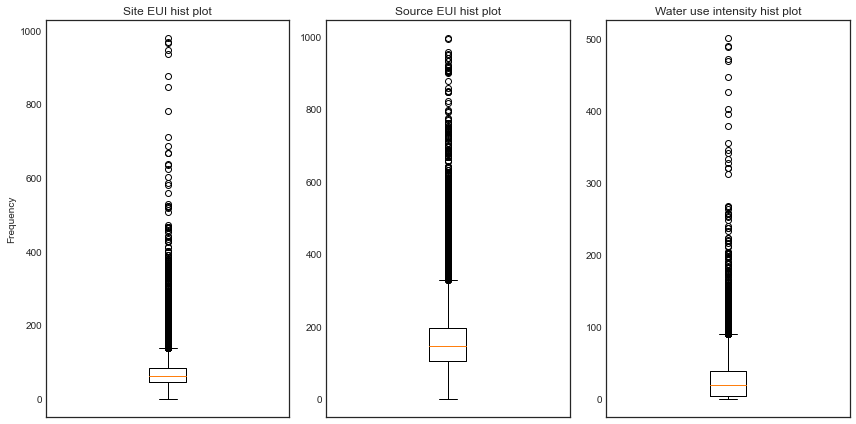

In [29]:
# histogram plot for the source eui to check data outliers
# Generate two normal distributions
dist1 = df[df['site_eui'] <= 1000]['site_eui']
dist2 = df[df['source_eui'] <= 1000]['source_eui']
dist3 = df[df['water_use_intensity'] <= 500]['water_use_intensity']
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True, figsize=(12, 6))

# plot two histograms for dataset
axs[0].boxplot(dist1)
axs[1].boxplot(dist2)
axs[2].boxplot(dist3)

# axs[2].set_ylim([0,1000])

# change subplot title
axs[0].set_title('Site EUI hist plot')
axs[1].set_title('Source EUI hist plot')
axs[2].set_title('Water use intensity hist plot')

axs[0].xaxis.set_visible(False)
axs[1].xaxis.set_visible(False)
axs[2].xaxis.set_visible(False)

# change x label
axs[0].set_xlabel('Site EUI')
axs[1].set_xlabel('Source EUI')
axs[2].set_xlabel('Water use')

# change y label
axs[0].set_ylabel('Frequency')

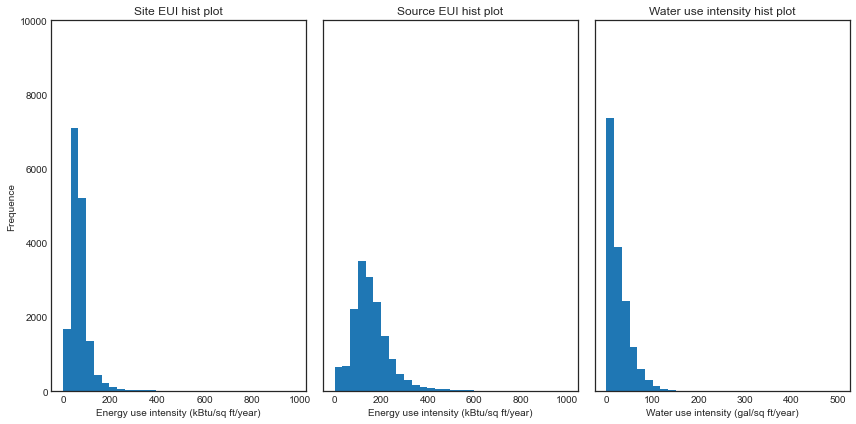

In [30]:
# histogram plot for the site, source eui and water use to check data outliers
# Generate two normal distributions
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, figsize=(12, 6))

# plot two histograms for dataset
bins = 30
axs[0].hist(dist1,bins=bins)
axs[1].hist(dist2,bins=bins)
axs[2].hist(dist3,bins=bins)

# change subplot title
axs[0].set_title('Site EUI hist plot')
axs[1].set_title('Source EUI hist plot')
axs[2].set_title('Water use intensity hist plot')

# change x label
axs[0].set_ylabel('Frequence')

# change y label
axs[0].set_xlabel('Energy use intensity (kBtu/sq ft/year)')
axs[0].set_ylim(0, 10000)

axs[1].set_xlabel('Energy use intensity (kBtu/sq ft/year)')
axs[1].set_ylim(0, 10000)

axs[2].set_xlabel('Water use intensity (gal/sq ft/year)')
axs[2].set_ylim(0, 10000)
axs[2].yaxis.set_visible(True)

#### From the box and histgram plots above, the data for site and source eui get very low frequence after site eui = 500 or source eui = 1000, and water use = 200. Therefore, the dataset filtered by this to get rid of the outliers.

In [31]:
# then, filter the dataset based on the standard above
df = df[(df['site_eui'] <= 500) &
               (df['source_eui'] <= 1000) &
               (df['water_use_intensity'] <= 200)]

# print the data shape and show the last five data rows
print(df.shape)
df.tail()

(16047, 18)


,data_year,property_status,year_built,primary_use,building_area,energy_star_rating,site_eui,source_eui,carbon_intensity,water_score_rating,chilled_water,hot_water,steam,renewable_energy,electricity_grid,natural_gas,oil_use,water_use_intensity
17457,2019,In Compliance,1967,commercial,162490.0,76,48.9,116.2,4.1,0,0.0,0.0,0.0,0.0,0.757988,0.242012,0.0,14.818143
17458,2021,In Compliance,2019,commercial,162490.0,84,41.0,92.4,3.3,0,0.0,0.0,0.0,0.0,0.687492,0.312508,0.0,12.717090
17459,2019,In Compliance,1963,commercial,56017.0,53,87.0,186.2,6.8,0,0.0,0.0,0.0,0.0,0.623124,0.376876,0.0,13.140654
17460,2020,In Compliance,1963,commercial,56017.0,57,72.1,155.2,5.6,0,0.0,0.0,0.0,0.0,0.630013,0.369987,0.0,5.746470
17461,2021,In Compliance,1963,commercial,56017.0,66,74.1,152.6,5.6,0,0.0,0.0,0.0,0.0,0.576399,0.423601,0.0,5.359087


<AxesSubplot:>

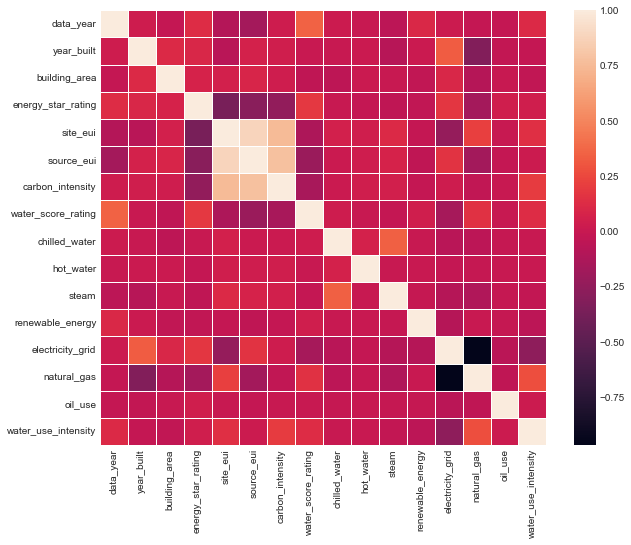

In [32]:
# try to make a matrix plot
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), linewidths=.5, ax=ax)

##### From the matrix above, the site EUI, source EUI, and carbon emissions have the relatively highest correlation.

##### 2.2 After removing the outliers, try to plot pairplot to show main features

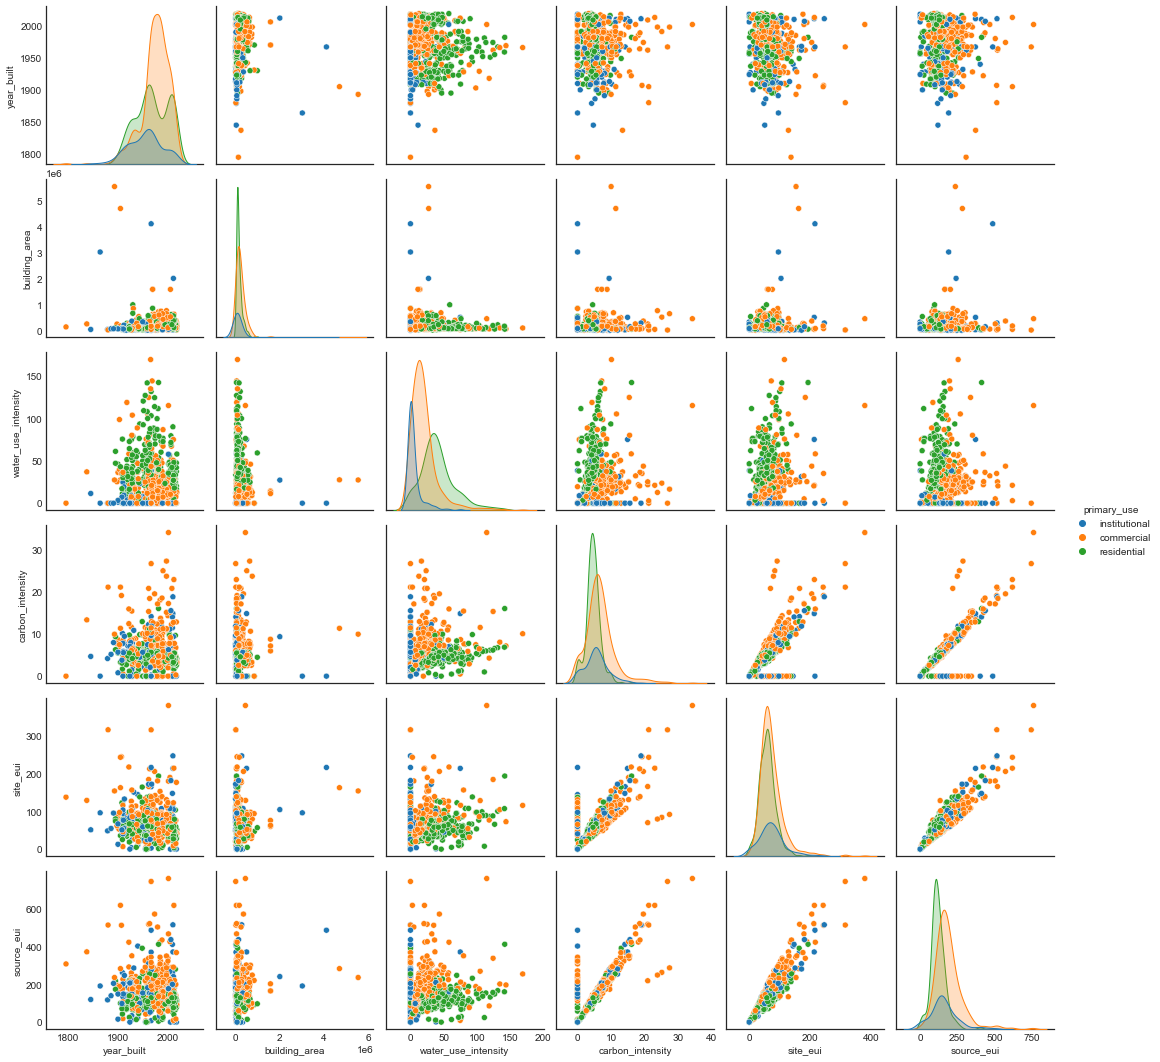

In [33]:
# sample 5% of total data points to make pairplot_01 (built year, building area, water use, co2, energy)
df_sample_01 = df.sample(df.shape[0]//20)
sns.pairplot(df_sample_01, vars=['year_built','building_area','water_use_intensity','carbon_intensity','site_eui','source_eui'], hue='primary_use')

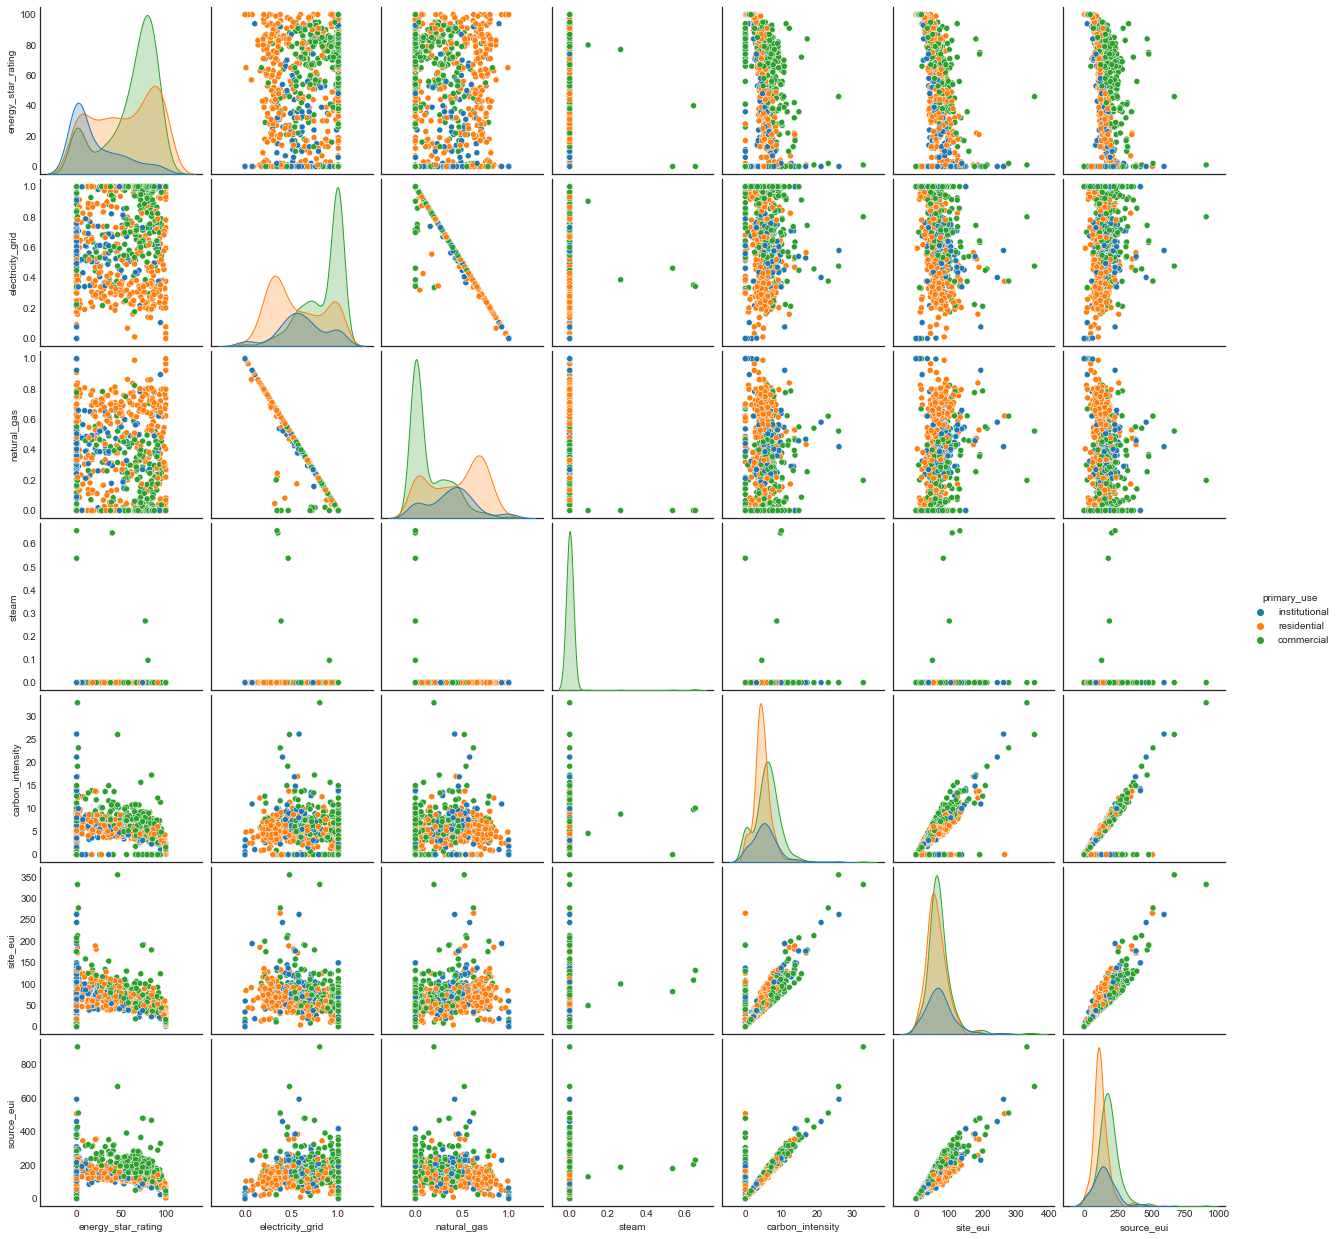

In [34]:
# sample 5% of total data points again to make pairplot_02 (energy star, electricity, natural gas, other energy types, co2 emission)
df_sample_02 = df.sample(df.shape[0]//20)
sns.pairplot(df_sample_02, vars=['energy_star_rating','electricity_grid','natural_gas','steam','carbon_intensity','site_eui','source_eui'], hue='primary_use')

##### 2.3 Try to cast the primary_use, data_year, and property_status categorical values by label encoding.
This step is to deal with the categorical values in the data for easier training and test purpose in the future.

In [35]:
# test encoding print out
LabelEncoder().fit_transform(df['primary_use'])

array([2, 2, 2, ..., 0, 0, 0])

In [36]:
# encoding for primary use, data year, and property status as label encoding
cols = ['primary_use', 'data_year', 'property_status']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
# primary_encode = LabelEncoder().fit_transform(df['primary_use'])
# df['primary_use'] = pd.Series(primary_encode)

#### 3. Question Definition Descriptions
##### Question 1 - classification problem, target variable: primary Use
- For this question, we are trying to explore if the primary use can be categorized by 'Residential', 'Comercial', and 'Institutional'?
- We would like to first group the buildings types into these three groups, and then use different classification algorithms to check if this could work.
- This will be easier for further analysis in terms of the energy use and carbon emissions.
##### Question 2 - prediction problem, target variable: Source Energy Use Intensity (source EUI)
- For this question, we are trying to explore if source energy use intensity can be predicted properly by regression models?
- We will test different regression models, including linear, polynomial, ridge, and random forest models for the performance.
##### Question 3 - prediction problem, target variable: Carbon Intensity
- This is the last question, which we are trying to explore if the carbon emissions for each building can be predicted by various regression models?
- We will also fit and train the dataset by different models, including lasso, ridge, and random forest to see which perform best.

#### 3. Question One: Try to Train Model with Classification (Set Target as Primary Use)
##### 3.1 Setup primary use as target value and use KNN to fit and train the model
The purpose for this is to test if the three building types (commercial, residential, and institutional) are easier to classified by different classification models, and it is necessary to create three different machine learning models for all three categories if they are easy to classify. This can improve the prediction performance.

In [37]:
# Initial proposal one: to do classification and set the target value as primary use
X_01 = df.drop(columns=['primary_use'])
y_01 = df['primary_use']

# split X_01_train, X_01_test, y_01_train, y_01_test by 80% and 20% with random statement of 42
X_01_train, X_01_test, y_01_train, y_01_test = train_test_split(X_01, y_01, test_size=0.20, random_state=42)

# print out sampled 10 data points
print((y_01_test).sample(10))

10314    0
16667    0
9256     0
16101    2
9336     0
4215     0
8265     0
11763    1
1418     0
11769    1
Name: primary_use, dtype: int32


In [38]:
# try to use KNN fit and train the model
knn = KNeighborsClassifier()
knn.fit(X_01_train, y_01_train)
knn_pred = knn.predict(X_01_test)
print(f'prediction for the model is:\n{knn_pred}\n')

# confusion matrix
knn_matrix = metrics.confusion_matrix(y_01_test, knn_pred)
print(f'matrix for the model is:\n{knn_matrix}\n')

# report
target_names = ['Commercial', 'Institutional', 'Residential']
knn_report = metrics.classification_report(y_01_test, knn_pred, target_names=target_names)
print(f'report for the model is:\n{knn_report}')

# accuracy
print(f'accuracy score is: {np.round(metrics.accuracy_score(y_01_test, knn_pred),4)}')

prediction for the model is:
[2 2 2 ... 0 2 0]

matrix for the model is:
[[1227   81  150]
 [ 109  391   60]
 [ 149   58  985]]

report for the model is:
               precision    recall  f1-score   support

   Commercial       0.83      0.84      0.83      1458
Institutional       0.74      0.70      0.72       560
  Residential       0.82      0.83      0.83      1192

     accuracy                           0.81      3210
    macro avg       0.80      0.79      0.79      3210
 weighted avg       0.81      0.81      0.81      3210

accuracy score is: 0.8109


##### The model performs well by KNN, which can achieve more than 80% of the accuracy.
This turns out that the three different categories are relatively easy to classify. Then try other two different classification methods to see the performance.

##### 3.2 Setup primary use as target value and use Gaussian Naive Bayes to fit and train the model

In [39]:
# try to use Gaussian Naive Bayes fit and train the model
gnb = GaussianNB()
gnb.fit(X_01_train, y_01_train)
gnb_pred = gnb.predict(X_01_test)
print(f'prediction for the model is:\n{gnb_pred}\n')

# confusion matrix
gnb_matrix = metrics.confusion_matrix(y_01_test, gnb_pred)
print(f'matrix for the model is:\n{gnb_matrix}\n')

# report
target_names = ['Commercial', 'Institutional', 'Residential']
gnb_report = metrics.classification_report(y_01_test, gnb_pred, target_names=target_names)
print(f'report for the model is:\n{gnb_report}')

# accuracy
print(f'accuracy score is: {np.round(metrics.accuracy_score(y_01_test, gnb_pred),4)}')

prediction for the model is:
[2 2 0 ... 0 2 0]

matrix for the model is:
[[1198  192   68]
 [ 252  293   15]
 [ 301   95  796]]

report for the model is:
               precision    recall  f1-score   support

   Commercial       0.68      0.82      0.75      1458
Institutional       0.51      0.52      0.51       560
  Residential       0.91      0.67      0.77      1192

     accuracy                           0.71      3210
    macro avg       0.70      0.67      0.68      3210
 weighted avg       0.74      0.71      0.71      3210

accuracy score is: 0.7125


##### From the Gaussian Naive Bayes model above, the model has 71.25% accuracy, which is a bit less than KNN, but still good.

##### 3.3 Setup primary use as target value and use Logistic Regression to fit and train the model

In [40]:
# fit the logistic model
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_01_train, y_01_train)
lr_pred = lr.predict(X_01_test)
print(f'prediction for the model is:\n{lr_pred}\n')

# print out the matrix
lr_matrix = metrics.confusion_matrix(y_01_test, lr_pred)
print(f'matrix for the model is:\n{lr_matrix}')

# logistic regression report
target_names = ['Commercial', 'Institutional', 'Residential']
class_report_lr = metrics.classification_report(y_01_test, lr_pred, target_names=target_names)
print(f'report for the model is:\n{class_report_lr}\n')

# print out the accuracy
print(f'accuracy score is: {np.round(metrics.accuracy_score(y_01_test, lr_pred),4)}')

prediction for the model is:
[2 2 1 ... 0 2 0]

matrix for the model is:
[[1195  175   88]
 [ 239  281   40]
 [ 165  103  924]]
report for the model is:
               precision    recall  f1-score   support

   Commercial       0.75      0.82      0.78      1458
Institutional       0.50      0.50      0.50       560
  Residential       0.88      0.78      0.82      1192

     accuracy                           0.75      3210
    macro avg       0.71      0.70      0.70      3210
 weighted avg       0.75      0.75      0.75      3210


accuracy score is: 0.7477


##### Using Logistic Regression model to train the model quickly, still getting 74.77% accuracy.

##### 3.4 Setup primary use as target value and use Random Forest to fit and train the model

In [41]:
# fit the Fandom Forest model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_01_train, y_01_train)
rfc_pred = rfc.predict(X_01_test)
print(f'prediction for the model is:\n{rfc_pred}\n')

# print out the matrix
rfc_matrix = metrics.confusion_matrix(y_01_test, rfc_pred)
print(f'matrix for the model is:\n{rfc_matrix}')

# Random Forest regression report
target_names = ['Commercial', 'Institutional', 'Residential']
class_report_lr = metrics.classification_report(y_01_test, rfc_pred, target_names=target_names)
print(f'report for the model is:\n{class_report_lr}\n')

# print out the accuracy
print(f'accuracy score is: {np.round(metrics.accuracy_score(y_01_test, rfc_pred),4)}')

prediction for the model is:
[2 2 1 ... 0 2 0]

matrix for the model is:
[[1362   53   43]
 [  51  485   24]
 [  33   26 1133]]
report for the model is:
               precision    recall  f1-score   support

   Commercial       0.94      0.93      0.94      1458
Institutional       0.86      0.87      0.86       560
  Residential       0.94      0.95      0.95      1192

     accuracy                           0.93      3210
    macro avg       0.92      0.92      0.92      3210
 weighted avg       0.93      0.93      0.93      3210


accuracy score is: 0.9283


##### Using Random Forest model to train the model quickly, still getting 92.83% accuracy, which is the highest one.
From the three classifications results above, the three primary use categories are easy to categorize, which demonstrates that using three separate prediction models for the energy and carbon emissions is a good choice.

#### 4. Question Two: Try to Train Model with Regression and Make Prediction for Source Energy (Set Target as Source Energy Use)
##### 4.1 Setup Source Energy Use Intensity (source EUI) as target value and use linear model to fast fit and train the model
After the test classification for the primary use above, we plan to make a test run for energy use and carbon emissions predictions below to see how does the regression models work for building energy and carbon emissions prediction perfromance.

In [42]:
# Initial proposal one: try to do regression and set the target value as source energy use intensity
# At the meantime, drop site eui in X training to avoid bias, as site eui can not be provided if source energy is not provided by the building owner.

X_02 = df.drop(columns=['site_eui', 'source_eui'])
y_02 = df['source_eui']

# split X_01_train, X_01_test, y_01_train, y_01_test by 80% and 20% with random statement of 42
X_02_train, X_02_test, y_02_train, y_02_test = train_test_split(X_02, y_02, test_size=0.20, random_state=42)

# print out sampled 10 data points
print((y_02_test).sample(10))

1806     136.3
3370     172.0
5437      90.1
9052     215.0
2626     167.1
6077     154.2
1476     183.2
11601    108.0
1671     192.6
14716    235.1
Name: source_eui, dtype: float64


In [43]:
# fit the data into linear model
lm = LinearRegression()
lm_01 = lm.fit(X_02_train,y_02_train)
r2_train = lm_01.score(X_02_train, y_02_train)
r2_test = lm_01.score(X_02_test, y_02_test)
print(f'r square for train is {np.round(r2_train,4)}')
print(f'r square for test is {np.round(r2_test,4)}')

# MSE
y_train_hat = lm_01.predict(X_02_train)
y_test_hat = lm_01.predict(X_02_test)

print(f'MSE for train is {np.round(mean_squared_error(y_02_train,y_train_hat),4)}')
print(f'MSE for test is {np.round(mean_squared_error(y_02_test,y_test_hat),4)}')

r square for train is 0.7032
r square for test is 0.6684
MSE for train is 2412.2883
MSE for test is 2961.3786


##### The model is good as R square for both training and test is around 0.7, which shows a good model fit.

##### 4.2 Using polynomial model to fast fit and train the model

In [44]:
#your code here 
def poly_trans(d):
    poly = PolynomialFeatures(degree=d)
    poly_data_train = poly.fit_transform(X_02_train)
    poly_data_test = poly.fit_transform(X_02_test)
    lm.fit(poly_data_train,y_02_train)

    r2_train = np.round(lm.score(poly_data_train, y_02_train),4)
    r2_test = np.round(lm.score(poly_data_test, y_02_test),4)
    MSE_train = np.round(mean_squared_error(y_02_train, lm.predict(poly_data_train)),4)
    MSE_test = np.round(mean_squared_error(y_02_test, lm.predict(poly_data_test)),4)
    
    return r2_train, MSE_train, r2_test, MSE_test

for i in range(1,4):
    r2_train, MSE_train, r2_test, MSE_test = poly_trans(i)
    print(f'degree = {i}, r2_train = {r2_train}, MSE_train = {MSE_train}')
    print(f'degree = {i}, r2_test = {r2_test}, MSE_test = {MSE_test}\n')

degree = 1, r2_train = 0.7032, MSE_train = 2412.2883
degree = 1, r2_test = 0.6684, MSE_test = 2961.3786

degree = 2, r2_train = 0.8722, MSE_train = 1038.6216
degree = 2, r2_test = 0.839, MSE_test = 1437.4501

degree = 3, r2_train = 0.8421, MSE_train = 1283.7893
degree = 3, r2_test = 0.6601, MSE_test = 3035.8672



##### According to the results above, as the degree increasing, the r square for test results increase. Also, the MSE for the test results also increase from degree = 3. Therefore, the degree = 2 is a better choice. In addition, the r2 for degree = 2 is more than 0.8, which is better than linear model above.

##### 4.3 Using Ridge model to fast fit and train the model

In [45]:
# try to train ridge model
model_ridge = Ridge(normalize=True)
coeficents = []
CV_score = []
alphas = np.logspace(-5, 5, 100)

# loop through all alphas to and store them into a list and use cv=5 to store cv score into a list
for a in alphas:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(X_02_train, y_02_train)
    ridge_scores = cross_val_score(model_ridge, X_02_train, y_02_train, cv=5)
    coeficents.append(model_ridge.coef_)
    CV_score.append(np.mean(ridge_scores))
print(CV_score)

[0.7002161047149906, 0.70021611113032, 0.7002161192115233, 0.7002161293865153, 0.7002161421903448, 0.700216158290335, 0.7002161785160841, 0.7002162038945763, 0.7002162356901146, 0.7002162754477597, 0.700216325037069, 0.7002163866896772, 0.7002164630186877, 0.7002165569985571, 0.700216671868805, 0.7002168108997735, 0.7002169769178883, 0.7002171714220194, 0.700217393016685, 0.7002176347184079, 0.7002178794212724, 0.7002180923782264, 0.7002182088745786, 0.7002181141974738, 0.7002176113209319, 0.7002163690957118, 0.7002138396518911, 0.7002091274401364, 0.7002007827672321, 0.7001864782919671, 0.7001625056819829, 0.7001229989181007, 0.7000587477405729, 0.6999554071655967, 0.6997908368832975, 0.6995312234501538, 0.6991255657512715, 0.6984980770471317, 0.6975381401164071, 0.6960877424508662, 0.6939269316951636, 0.6907588561511384, 0.6861973656108502, 0.6797616957040316, 0.6708839141914383, 0.6589348493599354, 0.6432725101552328, 0.6233132965157486, 0.5986208358787464, 0.5690007476996007, 0.534

##### loop through all the alpha values above, and find the best cv score relected to alpha

In [46]:
# find the best alpha and min cv error
best_cv_ridge = np.max(CV_score)
print("Min error (cv): ", best_cv_ridge)
index_minerr = np.where(CV_score == best_cv_ridge)[0]
print(index_minerr)
print("Best alpha: ", alphas[index_minerr])

Min error (cv):  0.7002182088745786
[22]
Best alpha:  [0.0016681]


##### The Best alpha value from Ridge model is 0.0016681, which indicates that the model performs best when alpha choose 0.0016681.

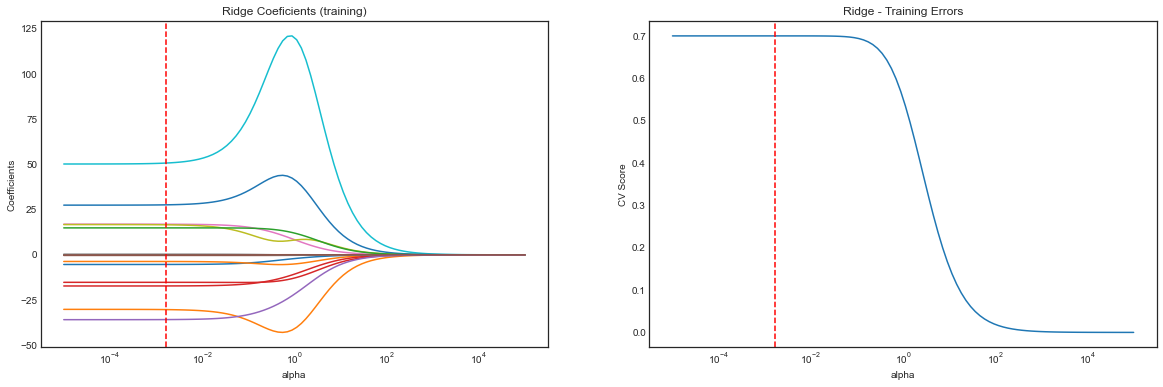

In [47]:
# plot two figures with best alpha
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coeficients (training)')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, CV_score,linestyle="-", label="Train")
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV Score')
plt.title('Ridge - Training Errors')
plt.axis('tight')

plt.show()

In [48]:
# Then using the best alpha to retrain the model and get the R square and MSE
model_ridge.set_params(alpha=alphas[index_minerr][0])
model_ridge.fit(X_02_train, y_02_train)
r2_train = model_ridge.score(X_02_train, y_02_train)
r2_test = model_ridge.score(X_02_test, y_02_test)
print(f'r square for train is {np.round(r2_train,4)}')
print(f'r square for test is {np.round(r2_test,4)}')

# MSE
y_train_hat = model_ridge.predict(X_02_train)
y_test_hat = model_ridge.predict(X_02_test)

print(f'MSE for train is {np.round(mean_squared_error(y_02_train,y_train_hat),4)}')
print(f'MSE for test is {np.round(mean_squared_error(y_02_test,y_test_hat),4)}')

r square for train is 0.7032
r square for test is 0.6684
MSE for train is 2412.3043
MSE for test is 2961.7096


##### From the results above, the R square and MSE is similar as linear regression model.

##### 4.4 Using Random Forest Regressor model to fit and train the model

In [49]:
# fit the data into Random Forest model
rfr = RandomForestRegressor(random_state=42)
rfr = rfr.fit(X_02_train,y_02_train)
r2_train = rfr.score(X_02_train, y_02_train)
r2_test = rfr.score(X_02_test, y_02_test)
print(f'r square for train is {np.round(r2_train,4)}')
print(f'r square for test is {np.round(r2_test,4)}')

# MSE
y_train_hat = rfr.predict(X_02_train)
y_test_hat = rfr.predict(X_02_test)

print(f'MSE for train is {np.round(mean_squared_error(y_02_train,y_train_hat),4)}')
print(f'MSE for test is {np.round(mean_squared_error(y_02_test,y_test_hat),4)}')

r square for train is 0.9913
r square for test is 0.9386
MSE for train is 71.0015
MSE for test is 548.2333


##### From the results above, the Random Forest model performs the best, which can achieve R square for train 0.9913, and test 0.0.9386. Also, the MSE for train is 71.0015 and test is 548.2333, which are much lower than the other models.

#### 5. Question Three: Try to Predict Carbon Emissions for the Model, and Set Carbon Intensity as Target Value
##### 5.1 Split the dataset with new X and y, and then retrain the dataset with Ridge
The carbon emissions intensity reflect building carbon footprint and impacts environment directly. Policy-makers, building designer, and owners pay lots of attentions on this, and a good carbon emission prediction can help them track and reduce green house gas emissions to the environment.

In [50]:
# Initial proposal one: try to do regression and set the target value as carbon emissions
X_03 = df.drop(columns=['carbon_intensity'])
y_03 = df['carbon_intensity']

# split X_01_train, X_01_test, y_01_train, y_01_test by 80% and 20% with random statement of 42
X_03_train, X_03_test, y_03_train, y_03_test = train_test_split(X_03, y_03, test_size=0.20, random_state=42)

# print out sampled 10 data points
print((y_03_test).sample(10))

2032      0.0
7141      0.0
11083     7.9
4246      0.0
1202     12.2
15648     5.2
14656     7.3
1045      4.7
9169      7.2
2664      6.3
Name: carbon_intensity, dtype: float64


In [51]:
# try to train ridge model
model_ridge = Ridge(normalize=True)
coeficents = []
CV_score = []
alphas = np.logspace(-5, 5, 100)

# loop through all alphas to and store them into a list
for a in alphas:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(X_03_train, y_03_train)
    ridge_scores = cross_val_score(model_ridge, X_03_train, y_03_train, cv=5)
    coeficents.append(model_ridge.coef_)
    CV_score.append(np.mean(ridge_scores))

In [52]:
# find the best alpha and min cv error
best_cv_ridge = np.max(CV_score)
print("Min error (cv): ", best_cv_ridge)
index_minerr = np.where(CV_score == best_cv_ridge)[0]
print(index_minerr)
print("Best alpha: ", alphas[index_minerr])

Min error (cv):  0.6743741168572388
[24]
Best alpha:  [0.00265609]


##### Use the similar method as last question and find the index of alpha. The Best alpha value from Ridge model is 0.00265609, which indicates that the model has a best performance with alpha of 0.00265609 to predict carbon emissions intensity.

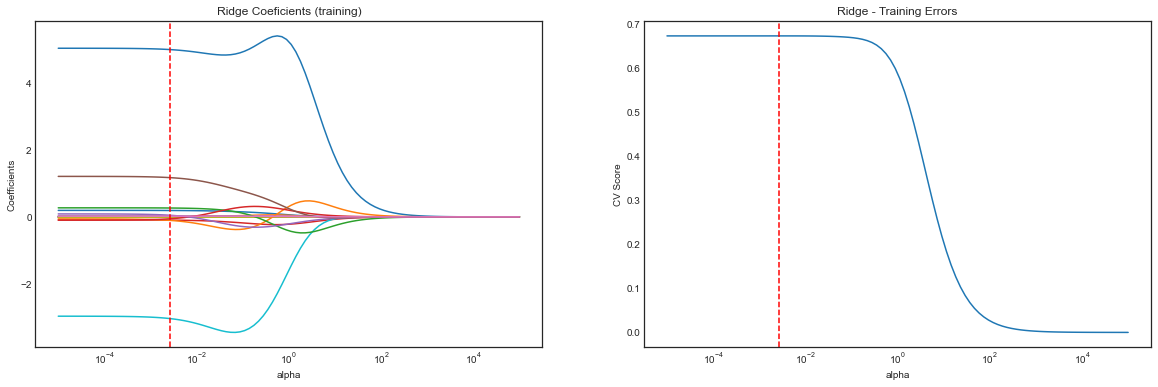

In [53]:
# plot two figures with best alpha
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coeficients (training)')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, CV_score,linestyle="-", label="Train")
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV Score')
plt.title('Ridge - Training Errors')
plt.axis('tight')

plt.show()

In [54]:
# Then using the best alpha to retrain the model and get the R square and MSE
model_ridge.set_params(alpha=alphas[index_minerr][0])
model_ridge.fit(X_03_train, y_03_train)
r2_train = model_ridge.score(X_03_train, y_03_train)
r2_test = model_ridge.score(X_03_test, y_03_test)
print(f'r square for train is {np.round(r2_train,4)}')
print(f'r square for test is {np.round(r2_test,4)}')

# MSE
y_train_hat = model_ridge.predict(X_03_train)
y_test_hat = model_ridge.predict(X_03_test)

print(f'MSE for train is {np.round(mean_squared_error(y_03_train,y_train_hat),4)}')
print(f'MSE for test is {np.round(mean_squared_error(y_03_test,y_test_hat),4)}')

r square for train is 0.679
r square for test is 0.6299
MSE for train is 4.8927
MSE for test is 5.7427


##### From the results above, the r squre for training is 0.6790, while for test is 0.6299, which are acceptable. The MSE for both train and test are 4.8927 and 5.7427.

##### This time, try Lasso as the second model to fit and train

In [55]:
# try to train lasso model
model_lasso = Lasso(max_iter=2000)
coeficents = []
CV_score = []
alphas = np.logspace(-5, 3, 50)

# loop through all alphas to and store them into a list
for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X_03_train, y_03_train)
    lasso_scores = cross_val_score(model_lasso, X_03_train, y_03_train, cv=5)
    coeficents.append(model_lasso.coef_)
    CV_score.append(np.mean(lasso_scores))

In [56]:
# find the best alpha and min cv error
best_cv_lasso = np.max(CV_score)
print("Min error (cv): ", best_cv_ridge)
index_minerr = np.where(CV_score == best_cv_lasso)[0]
print(index_minerr)
print("Best alpha: ", alphas[index_minerr])

Min error (cv):  0.6743741168572388
[3]
Best alpha:  [3.0888436e-05]


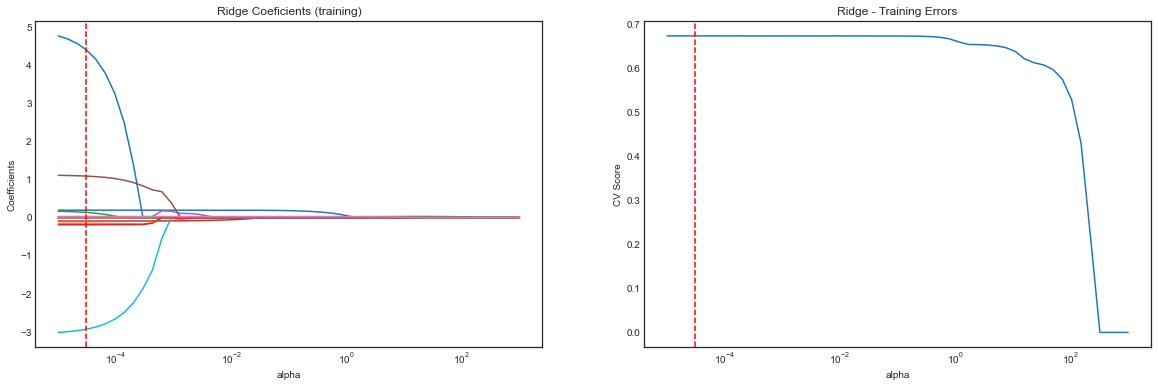

In [57]:
# plot two figures with best alpha for lasso model
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coeficients (training)')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, CV_score,linestyle="-", label="Train")
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV Score')
plt.title('Ridge - Training Errors')
plt.axis('tight')

plt.show()

In [58]:
# Then using the best alpha to retrain the model and get the R square and MSE
model_lasso.set_params(alpha=alphas[index_minerr][0])
model_lasso.fit(X_03_train, y_03_train)
r2_train = model_lasso.score(X_03_train, y_03_train)
r2_test = model_lasso.score(X_03_test, y_03_test)
print(f'r square for train is {np.round(r2_train,4)}')
print(f'r square for test is {np.round(r2_test,4)}')

# MSE
y_train_hat = model_lasso.predict(X_03_train)
y_test_hat = model_lasso.predict(X_03_test)

print(f'MSE for train is {np.round(mean_squared_error(y_03_train,y_train_hat),4)}')
print(f'MSE for test is {np.round(mean_squared_error(y_03_test,y_test_hat),4)}')

r square for train is 0.6791
r square for test is 0.6299
MSE for train is 4.8924
MSE for test is 5.7419


##### From the result of Lasso model above, the R square for train and test are similar as Ridge model: the train is 0.6791 and test is 0.6299. Besides, the MSE values for train and test are 4.8924 and 5.7419.

##### 5.2 Again, using Random Forest Regressor to fit and train the data

In [59]:
# fit the data into Random Forest model
rfr = RandomForestRegressor(random_state=42)
rfr = rfr.fit(X_03_train,y_03_train)
r2_train = rfr.score(X_03_train, y_03_train)
r2_test = rfr.score(X_03_test, y_03_test)
print(f'r square for train is {np.round(r2_train,4)}')
print(f'r square for test is {np.round(r2_test,4)}')

# MSE
y_train_hat = rfr.predict(X_03_train)
y_test_hat = rfr.predict(X_03_test)

print(f'MSE for train is {np.round(mean_squared_error(y_03_train,y_train_hat),4)}')
print(f'MSE for test is {np.round(mean_squared_error(y_03_test,y_test_hat),4)}')

r square for train is 0.9931
r square for test is 0.9692
MSE for train is 0.1047
MSE for test is 0.4775


##### Create the parameter grid to choose the best parameters.

In [60]:
# First get the default parameter for the random forest
print(f'The training default parameters are {rfc.get_params(deep=True)}\n')

# The get the sqrt for the total training feature number
print(f'The training number in the algorithm is {int(np.sqrt(X_03_train.shape[1]))}')

The training default parameters are {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

The training number in the algorithm is 4


In [61]:
# create the parameter grid with the default estimators (100), default max_feature (sqrt), and min_sample_split (2)
# For the timebeing, the grid search will split estimatros into four: 60, 180, 300, and the default value: 100
param_grid = {
    'max_features': [int(np.sqrt(X_03_train.shape[1])), 5],
    'min_samples_split': [2, 3],
    'n_estimators': sorted([int(n) for n in np.linspace(start = 60, stop = 300, num = 3)]+[int(100)])
}

# print out the parameters
print(param_grid)

# creat the RF model
rfc = RandomForestRegressor(random_state=42)

# input the grid search into the model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)
grid_search.fit(X_03_train, y_03_train)

{'max_features': [4, 5], 'min_samples_split': [2, 3], 'n_estimators': [60, 100, 180, 300]}


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': [4, 5], 'min_samples_split': [2, 3],
                         'n_estimators': [60, 100, 180, 300]})

In [62]:
# print out the best params
best_params = grid_search.best_params_
print(best_params)

{'max_features': 5, 'min_samples_split': 2, 'n_estimators': 180}


In [63]:
# re-fit the data into Random Forest model by best params above
rfr = RandomForestRegressor(**best_params,random_state=42)
rfr = rfr.fit(X_03_train,y_03_train)
r2_train = rfr.score(X_03_train, y_03_train)
r2_test = rfr.score(X_03_test, y_03_test)
print(f'r square for train is {np.round(r2_train,4)}')
print(f'r square for test is {np.round(r2_test,4)}')

# MSE
y_train_hat = rfr.predict(X_03_train)
y_test_hat = rfr.predict(X_03_test)

print(f'MSE for train is {np.round(mean_squared_error(y_03_train,y_train_hat),4)}')
print(f'MSE for test is {np.round(mean_squared_error(y_03_test,y_test_hat),4)}')

r square for train is 0.9941
r square for test is 0.9728
MSE for train is 0.0896
MSE for test is 0.4224


##### From the grid-search for the parameter selection, the R square for both train and test have been imporved: train is 0.9941, and test is 0.9728. Also, the MSE for both also increased: train is 0.0896 and test is 0.4224.

#### REFERENCES
##### get the ideas from our homework 1-3 solutions and labs
##### https://matplotlib.org/stable/gallery/statistics/hist.html
##### https://stackoverflow.com/questions/13611065/efficient-way-to-apply-multiple-filters-to-pandas-dataframe-or-series
##### https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas
##### https://stackoverflow.com/questions/65745067/drop-row-if-one-column-is-greater-than-another
##### https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
##### https://scikit-learn.org/stable/moles/cross_validation.html
##### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
##### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
##### https://seaborn.pydata.org/generated/seaborn.pairplot.html